- Gradient boosting is an ensemble of decision trees algorithms
- Boosting refers to a class of ensemble learning algorithms that add tree models to an ensemble sequentially
- Each tree model added to the ensemble attempts to correct the prediction errors made by the tree models already present in the ensemble
- It may be one of the most popular techniques for structured (tabular) classification and regression predictive modeling problems given that it performs so well across a wide range of datasets in practice
- A major problem of gradient boosting is that it is slow to train the model
- This is because trees must be created and added sequentially, unlike other ensemble models like random forest where ensemble members can be trained in parallel, exploiting multiple CPU cores
- Training the trees that are added to the ensemble can be dramatically accelerated by discretizing (binning) the continuous input variables to a few hundred unique values
- Gradient boosting ensembles that implement this technique and tailor the training algorithm around input variables under this transform are referred to as histogram-based gradient boosting ensembles
- The construction of decision trees can be speed up significantly by reducing the number of values for continuous input features. This can be achieved by discretization or binning values into a fixed number of buckets. This can reduce the number of unique values for each feature from tens of thousands down to a few hundred.

#### Histogram Gradient Boosting With Scikit-Learn

>10 0.945 (0.009)
>50 0.944 (0.007)
>100 0.944 (0.008)
>150 0.944 (0.008)
>200 0.944 (0.007)
>255 0.943 (0.007)


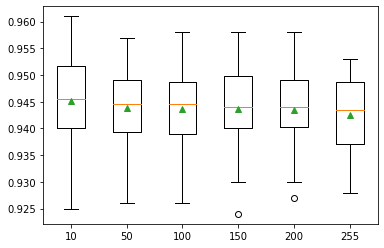

In [1]:
# compare number of bins for sklearn histogram gradient boosting
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from matplotlib import pyplot

def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
    return X, y

def get_models():
    models = dict()
    for i in [10, 50, 100, 150, 200, 255]:
        models[str(i)] = HistGradientBoostingClassifier(max_bins=i, max_iter=100)
    return models

def evaluate_model(model, X, y):   
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores


X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [2]:
results    

[array([0.961, 0.943, 0.954, 0.944, 0.937, 0.936, 0.94 , 0.937, 0.947,
        0.951, 0.959, 0.944, 0.954, 0.951, 0.929, 0.925, 0.956, 0.957,
        0.954, 0.946, 0.941, 0.952, 0.944, 0.948, 0.929, 0.936, 0.949,
        0.945, 0.947, 0.94 ]),
 array([0.955, 0.951, 0.95 , 0.944, 0.943, 0.926, 0.941, 0.937, 0.948,
        0.957, 0.95 , 0.947, 0.949, 0.94 , 0.935, 0.928, 0.949, 0.946,
        0.951, 0.941, 0.945, 0.945, 0.948, 0.941, 0.936, 0.939, 0.944,
        0.938, 0.937, 0.951]),
 array([0.954, 0.945, 0.958, 0.939, 0.939, 0.926, 0.94 , 0.944, 0.948,
        0.953, 0.947, 0.941, 0.947, 0.947, 0.931, 0.928, 0.951, 0.943,
        0.95 , 0.938, 0.942, 0.949, 0.944, 0.952, 0.935, 0.935, 0.948,
        0.938, 0.946, 0.952]),
 array([0.958, 0.945, 0.952, 0.938, 0.942, 0.931, 0.93 , 0.944, 0.949,
        0.953, 0.955, 0.942, 0.944, 0.949, 0.93 , 0.924, 0.951, 0.946,
        0.95 , 0.942, 0.946, 0.941, 0.952, 0.94 , 0.946, 0.937, 0.942,
        0.94 , 0.937, 0.952]),
 array([0.949, 0.944, 0.

We can see that increasing the number of bins in the histogram appears to reduce the spread of the distribution

#### Histogram Gradient Boosting With XGBoost

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

X, y = make_classification(n_samples=10000, n_features=100, n_informative=50, n_redundant=50, random_state=1)
model = XGBClassifier(tree_method='approx', max_bin=255, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.875 (0.010)
